##Libraries

In [25]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

## Load Wine dataset

In [26]:
data = load_wine()
X = data.data
y = data.target

##Standardisation & Splitting into train & test

In [27]:
# Split the dataset test & train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

##Function

In [30]:
# Function to evaluate model performance
def evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall


In [31]:
model = LogisticRegression(max_iter=1000)
accuracy_baseline, precision_baseline, recall_baseline = evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)

print(f"Accuracy baseline: {accuracy_baseline}, \nPrecision baseline: {precision_baseline}, \nRecall baseline: {recall_baseline}")

Accuracy baseline: 0.9814814814814815, 
Precision baseline: 0.9777777777777779, 
Recall baseline: 0.9841269841269842


##Train & Evaluate

In [32]:
components = [2, 5, 10]
pca_accuracies = []
pca_precisions = []
pca_recalls = []

for n_components in components:

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    accuracy, precision, recall = evaluate(model, X_train_pca, y_train, X_test_pca, y_test)

    pca_accuracies.append(accuracy)
    pca_precisions.append(precision)
    pca_recalls.append(recall)

    print(f"\nPCA Components: {n_components}, \nAccuracy: {accuracy}, \nPrecision: {precision}, \nRecall: {recall}")



PCA Components: 2, 
Accuracy: 0.6851851851851852, 
Precision: 0.6407773386034256, 
Recall: 0.6507936507936507

PCA Components: 5, 
Accuracy: 1.0, 
Precision: 1.0, 
Recall: 1.0

PCA Components: 10, 
Accuracy: 1.0, 
Precision: 1.0, 
Recall: 1.0


##Visualisation

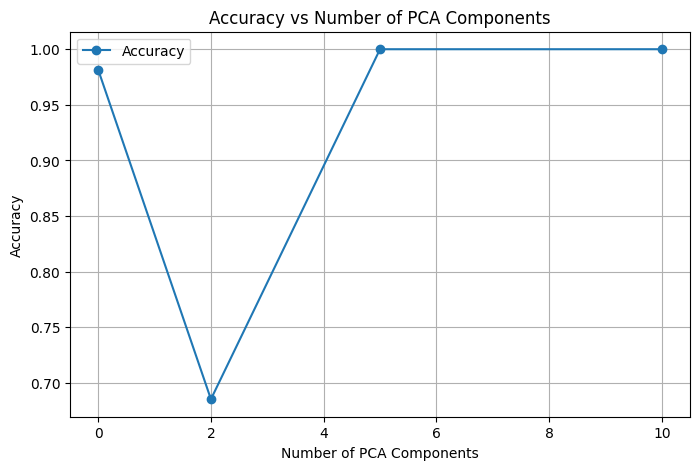

In [33]:

# Plot the results - Accuracy vs Number of PCA Components
plt.figure(figsize=(8, 5))
plt.plot([0] + components, [accuracy_baseline] + pca_accuracies, marker='o', label='Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of PCA Components')
plt.grid(True)
plt.legend()
plt.show()
